<a href="https://colab.research.google.com/github/Fosh1er/stress_score_AI/blob/main/Stress_score_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для начала переводим наши данные из текста в тензор.

In [ ]:
import numpy as np
import os
from scipy.signal import butter, lfilter

def parse_file_to_tensors(filename):
    with open(filename, 'r', encoding='cp1251') as file:
        lines = file.readlines()

    tensors = []
    current_fragment_data = []
    number_of_channels = None
    for line in lines:
        if line.startswith('// Информация о треке'):

            if number_of_channels is None:
                number_of_channels = 0
            number_of_channels += 1
        elif line.startswith('// Информация по фрагменту'):
            if current_fragment_data:
                tensor = np.array(current_fragment_data, dtype=np.float32)
                tensors.append(tensor.reshape(-1, number_of_channels))
                current_fragment_data = []
        elif line.startswith('Время(мс)'):
            continue
        else:
            line_data = line.strip().split('\t')
            if line_data and len(line_data) > 1:
                converted_data = [float(value.replace(',', '.')) for value in line_data[1:]]
                if len(converted_data) == number_of_channels:
                    current_fragment_data.append(converted_data)
                else:
                    print(f"Warning: Incorrect number of data points in line: {line.strip()}")

    if current_fragment_data:
        tensor = np.array(current_fragment_data, dtype=np.float32)
        tensors.append(tensor.reshape(-1, number_of_channels))

    return tensors


def process_folder(folder_path):
    files_tensors = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            full_path = os.path.join(folder_path, filename)
            print(filename)
            tensors = parse_file_to_tensors(full_path)
            files_tensors[filename] = tensors

    return files_tensors


folder_path = '/Данные'
all_tensors = process_folder(folder_path)


for filename, tensors in all_tensors.items():
    print(f'Файл: {filename}')
    print(f'Количество фрагментов: {len(tensors)}')
    for i, tensor in enumerate(tensors):
        print(f'  Фрагмент: {i+1}, форма тензора: {tensor.shape}')
        print(len(tensor))


Грекова Ксения.txt
Небольсин Антон.txt
Наумов Никита.txt
Данилов Степан.txt
Ходенко Марина.txt
Гуменная Елизавета.txt
Фалько Филипп.txt
Сапкина Эльмира.txt
Молочаев Алексей.txt
Каманюк Анна.txt
Файл: Грекова Ксения.txt
Количество фрагментов: 6
  Фрагмент: 1, форма тензора: (75084, 8)
75084
  Фрагмент: 2, форма тензора: (75079, 8)
75079
  Фрагмент: 3, форма тензора: (76451, 8)
76451
  Фрагмент: 4, форма тензора: (75073, 8)
75073
  Фрагмент: 5, форма тензора: (75572, 8)
75572
  Фрагмент: 6, форма тензора: (75077, 8)
75077
Файл: Небольсин Антон.txt
Количество фрагментов: 6
  Фрагмент: 1, форма тензора: (75138, 8)
75138
  Фрагмент: 2, форма тензора: (75335, 8)
75335
  Фрагмент: 3, форма тензора: (89344, 8)
89344
  Фрагмент: 4, форма тензора: (76562, 8)
76562
  Фрагмент: 5, форма тензора: (75110, 8)
75110
  Фрагмент: 6, форма тензора: (75076, 8)
75076
Файл: Наумов Никита.txt
Количество фрагментов: 6
  Фрагмент: 1, форма тензора: (75088, 8)
75088
  Фрагмент: 2, форма тензора: (75103, 8)
7510

Фрагменты это:
1 - Исходный фон
2 - Закрытые глаза
3 - Тон
4 - Когнитивная нагрузка
5 - Электростимуляция
6 - Итоговый фон


In [ ]:
filename_to_modify = 'Фалько Филипп.txt'
fragment_index_to_modify = 1
line_number_to_remove = '24908'

if filename_to_modify in all_tensors and len(all_tensors[filename_to_modify]) > fragment_index_to_modify:
    fragment = all_tensors[filename_to_modify][fragment_index_to_modify]


    index_to_remove = None
    for i, line_data in enumerate(fragment):
        if line_data[0] == line_number_to_remove:
            index_to_remove = i
            break

    if index_to_remove is not None:
        all_tensors[filename_to_modify][fragment_index_to_modify] = np.delete(fragment, index_to_remove, axis=0)
        print(f'Line {line_number_to_remove} removed from fragment {fragment_index_to_modify+1} in file {filename_to_modify}.')
    else:
        print(f'Line number {line_number_to_remove} not found in fragment {fragment_index_to_modify+1}.')
else:
    print(f"File {filename_to_modify} or fragment {fragment_index_to_modify+1} not found.")


Теперь отфильтруем наши данные, чтобы избежать выбросов для каждого канала отдельно.



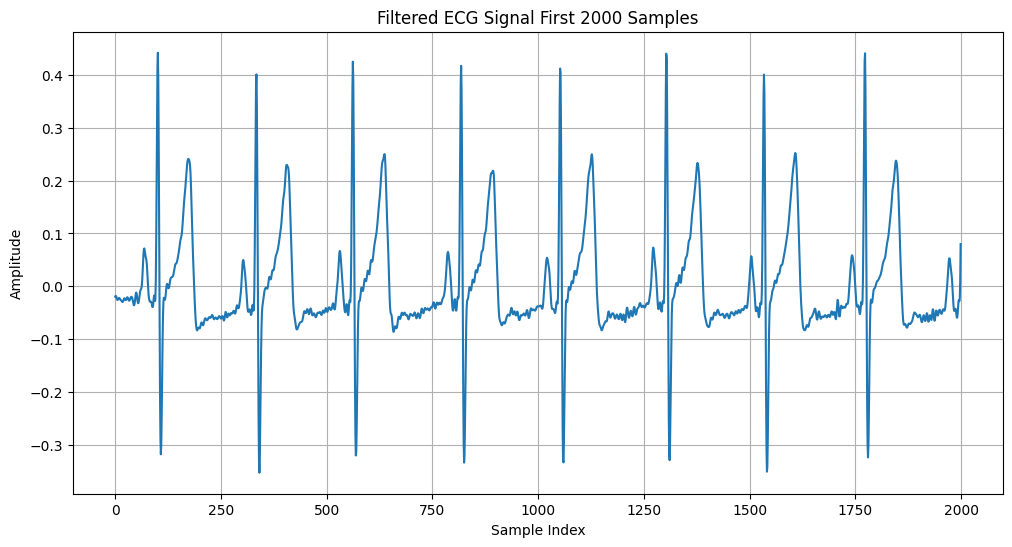

{'Грекова Ксения.txt': [array([[-2.49617888e-02, -3.61727334e-01,  8.69753261e-01, ...,
        -2.73898588e-01, -6.98206284e+00, -5.54501100e+00],
       [-1.63206099e-02, -3.66725620e-01,  1.26272608e+00, ...,
        -3.90705074e+00, -9.25702238e+00, -1.09445392e+01],
       [-1.44105850e-02, -3.71570798e-01,  1.65123276e+00, ...,
        -5.45933220e+00, -1.31072573e+01, -1.50148461e+01],
       ...,
       [ 2.51073381e-02,  5.05641580e-02,  6.44181682e+00, ...,
         1.50834069e+01,  4.85282282e+00,  5.17104920e+00],
       [ 1.24456101e-02,  4.61772809e-02,  5.82990148e+00, ...,
         7.29669218e+00,  3.05679969e+00,  3.56579095e+00],
       [-1.46844615e-03,  4.17681174e-02,  5.22184384e+00, ...,
        -2.13315034e-01,  6.08476605e-01, -7.85099361e-01]]), array([[-1.29706679e-03, -9.27891288e-01, -6.70842559e+00, ...,
         3.60946258e+00,  4.19857000e+00,  3.29968164e+00],
       [-4.99767446e-03, -9.95718085e-01, -6.48492344e+00, ...,
         1.31359443e+00,  4.70

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter, filtfilt, medfilt
import matplotlib.pyplot as plt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y
def apply_median_filter(data, kernel_size=5):
    return medfilt(data, kernel_size=kernel_size)

track_filters = {
    0: {'lowcut': 0.5, 'highcut': 40, 'order': 5},  # ЭКГ
    1: {'lowcut': 0.05, 'highcut': 5, 'order': 3},  # ФПГ
    2: {'lowcut': 0.05, 'highcut': 5, 'order': 3},  # ФПГ дифференциальный
    3: {'lowcut': 0.1, 'highcut': 3, 'order': 3},   # КГР
    4: {'lowcut': 1, 'highcut': 50, 'order': 4},    # ЭЭГ-ПОЛИ1
    5: {'lowcut': 1, 'highcut': 50, 'order': 4},    # ЭЭГ-ПОЛИ2
    6: {'lowcut': 1, 'highcut': 50, 'order': 4},    # ЭЭГ-ПОЛИ3
    7: {'lowcut': 1, 'highcut': 50, 'order': 4},    # ЭЭГ-ПОЛИ4
}
all_tensors_filtred={}
for filename, tensors in all_tensors.items():
    filtered_tensors = []
    fs = 250
    for i, tensor in enumerate(tensors):
        filtered_fragment = np.zeros(tensor.shape)
        for channel_idx in range(tensor.shape[1]):
            channel_data = tensor[:, channel_idx]

            if channel_idx in [2, 3, 4]:
                median_filtered_data = apply_median_filter(channel_data, 5)
                used_data = median_filtered_data
            else:
                used_data = channel_data

            filter_config = track_filters.get(channel_idx)
            if filter_config:
                filtered_data = butter_bandpass_filter(channel_data, filter_config['lowcut'], filter_config['highcut'], fs, filter_config['order'])
                filtered_fragment[:, channel_idx] = filtered_data
            else:
                print(f"Нет информации по фильтрации для канала {channel_idx}")
        filtered_tensors.append(filtered_fragment)
        tensors[i] = filtered_tensors[i]


def plot_first_1000(data, channel_idx=0, title='Filtered ECG Signal', xlabel='Sample Index', ylabel='Amplitude'):

    plt.figure(figsize=(12, 6))
    plt.plot(data[:2000, channel_idx])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


first_filtered_tensor = tensors[0]


plot_first_1000(first_filtered_tensor, channel_idx=0, title='Filtered ECG Signal First 2000 Samples')
print(all_tensors)

Выделим ритмы ЭЭГ

In [ ]:

from scipy.signal import butter, lfilter

rhythms = {'delta': (0.5, 4),
           'theta': (4, 8),
           'alpha': (8, 13),
           'beta': (13, 30),
           'gamma': (30, 100)}

fs = 250

for filename, tensors in all_tensors.items():
    print(f'Испытуемый: {filename}')
    for tensor in tensors:
        eeg_data = tensor[:, 4:8]
        for rhythm_name, (lowcut, highcut) in rhythms.items():
            #print(f'Ритм: {rhythm_name}')
            for i in range(eeg_data.shape[1]):
                channel_data = eeg_data[:, i]

                filtered_data = butter_bandpass_filter(channel_data, lowcut, highcut, fs, order=4)

                #plt.plot(filtered_data)
                #plt.title(f'Канал {i+1}, {rhythm_name} ритм')
                #plt.show()

Проанализируем данные ритмов ЭЭГ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import welch
fs = 250
for filename, tensors in all_tensors.items():
    print(f'Испытуемый: {filename}')
    for i, tensor in enumerate(tensors):
        eeg_data = tensor[:, 4:8]

        for channel_index in range(eeg_data.shape[1]):
            channel_data = eeg_data[:, channel_index]
            fft_values = fft(channel_data)
            n = len(channel_data)
            fft_values = fft_values[0:int(n/2)]
            freqs = np.fft.fftfreq(n, 1/fs)[:int(n/2)]
            power_spect = np.abs(fft_values)**2/n
'''
            # Визуализация
            plt.figure(figsize=(12, 6))
            plt.plot(freqs, power_spect)
            plt.title(f'Спектр мощности для испытуемого {filename}, фрагмент {i+1}, канал {channel_index+4}')
            plt.xlabel('Частота (Гц)')
            plt.ylabel('Мощность спектра')
            plt.xlim(0, 60)  # Ограничим до 60 Гц для наглядности
            plt.grid()
            plt.show()
'''

Оценим мощности спектров методом Велча


In [ ]:
from scipy.signal import welch
import matplotlib.pyplot as plt
import numpy as np

fs = 250
spectral_data = {}

for filename, tensors in all_tensors.items():
    spectral_data[filename] = {}
    for i, tensor in enumerate(tensors):
        eeg_data = tensor[:, 4:8]
        spectral_data[filename][f'frag_{i+1}'] = []
        for channel_index in range(eeg_data.shape[1]):
            channel_data = eeg_data[:, channel_index]
            freqs, power_spect = welch(channel_data, fs, nperseg=1024)

            spectral_data[filename][f'frag_{i+1}'].append((freqs, power_spect))
'''
            plt.figure(figsize=(10, 6))
            plt.semilogy(freqs, power_spect)
            plt.title(f'Спектр мощности для {filename}, фр. {i+1}, канал {channel_index+4}')
            plt.xlabel('Частота (Гц)')
            plt.ylabel('Мощность (dB)')
            plt.xlim([0, 60])  # Ограничение частоты для наглядности
            plt.grid()
            plt.show()
'''

Также можем посмотреть статистику для например альфа-ритма

In [ ]:
alpha_power_values = []

for filename, fragments in spectral_data.items():
    for frag, channels_data in fragments.items():
        for freqs, power_spect in channels_data:
            alpha_indices = np.where((freqs >= 8) & (freqs <= 13))
            alpha_power = np.mean(power_spect[alpha_indices])
            alpha_power_values.append(alpha_power)
from scipy import stats

group1 = alpha_power_values[:len(alpha_power_values)//2]
group2 = alpha_power_values[len(alpha_power_values)//2:]

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


А теперь приведем все тензоры фрагментов к единой размерности, применив метод линейной интерполяции.

In [ ]:
import numpy as np

def find_min_length(tensors):

    min_length = float('inf')
    for tensor in tensors:
        if tensor.shape[0] < min_length:
            min_length = tensor.shape[0]
    return min_length

def trim_tensors_to_min_length(all_tensors):

    min_length = float('inf')
    for tensors in all_tensors.values():
        current_min = find_min_length(tensors)
        if current_min < min_length:
            min_length = current_min

    trimmed_all_tensors = {}
    for filename, tensors in all_tensors.items():
        trimmed_tensors = [tensor[:min_length, :] for tensor in tensors if tensor.shape[0] >= min_length]
        trimmed_all_tensors[filename] = trimmed_tensors

    return trimmed_all_tensors
trimmed_all_tensors=trim_tensors_to_min_length(all_tensors)
print(trimmed_all_tensors)

{'Грекова Ксения.txt': [array([[-2.49617888e-02, -3.61727334e-01,  8.69753261e-01, ...,
        -2.73898588e-01, -6.98206284e+00, -5.54501100e+00],
       [-1.63206099e-02, -3.66725620e-01,  1.26272608e+00, ...,
        -3.90705074e+00, -9.25702238e+00, -1.09445392e+01],
       [-1.44105850e-02, -3.71570798e-01,  1.65123276e+00, ...,
        -5.45933220e+00, -1.31072573e+01, -1.50148461e+01],
       ...,
       [-3.53437882e-02, -1.50405530e+00, -1.21065834e+01, ...,
         1.02157682e+00,  2.94657430e+00,  2.50948366e+00],
       [-3.52216677e-02, -1.55425548e+00, -1.16247678e+01, ...,
         1.17236741e+00,  3.12236449e+00,  5.94874095e-01],
       [-9.43905959e-03, -1.60259669e+00, -1.11457830e+01, ...,
         1.85376973e+00,  3.66482801e-01, -1.80772026e+00]]), array([[-1.29706679e-03, -9.27891288e-01, -6.70842559e+00, ...,
         3.60946258e+00,  4.19857000e+00,  3.29968164e+00],
       [-4.99767446e-03, -9.95718085e-01, -6.48492344e+00, ...,
         1.31359443e+00,  4.70

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

def calculate_mean_size(sizes):

    total_size = sum(sizes)
    mean_size = total_size // len(sizes)

def interpolate_tensor(tensor, new_size, kind='cubic'):
    original_indices = np.linspace(0, tensor.shape[0]-1, tensor.shape[0])
    new_indices = np.linspace(0, tensor.shape[0]-1, new_size)

    interpolated_tensor = np.zeros((new_size, tensor.shape[1]))

    for i in range(tensor.shape[1]):
        if tensor.shape[0] > 3:
            interpolator = interp1d(original_indices, tensor[:, i], kind=kind, fill_value='extrapolate')
        else:
            interpolator = interp1d(original_indices, tensor[:, i], kind='linear', fill_value='extrapolate')
        interpolated_tensor[:, i] = interpolator(new_indices)

    return interpolated_tensor

all_tensors_sizes = []
for tensors in all_tensors.values():
    for tensor in tensors:
        all_tensors_sizes.append(tensor.shape[0])

mean_size = calculate_mean_size(all_tensors_sizes)

for filename, tensors in all_tensors.items():
    print(f'Обработка файла: {filename}')
    interpolated_tensors = [interpolate_tensor(tensor, mean_size) for tensor in tensors]
    all_tensors[filename] = interpolated_tensors
print(tensor)

Модель случайного леса

In [ ]:
!pip install heartpy
'''
def analyze_skin_conductance(all_tensors, channel=3):  # каналы индексируются с 0, поэтому 4-й канал это индекс 3
    results = {}
    for subject, fragments in all_tensors.items():
        mean_amplitudes = []
        std_deviations = []
        for fragment in fragments:

            kgr_data = fragment[:, channel]

            mean_amp = np.mean(kgr_data)
            std_dev = np.std(kgr_data)

            mean_amplitudes.append(mean_amp)
            std_deviations.append(std_dev)


        results[subject] = {
            'mean_amplitude(kOhm)': np.mean(mean_amplitudes),
            'std_deviation(kOhm)': np.mean(std_deviations)
        }
    return results

kgr_analysis_results = analyze_skin_conductance(all_tensors)

for subject, values in kgr_analysis_results.items():
    print(f'{subject}: Средняя амплитуда КГР = {values[“mean_amplitude(kOhm)”]:.2f} кОм, '
          f'Стандартное отклонение = {values[“std_deviation(kOhm)”]:.2f} кОм')
    '''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.1 MB/s eta 0:00:00


"\ndef analyze_skin_conductance(all_tensors, channel=3):  # каналы индексируются с 0, поэтому 4-й канал это индекс 3\n    results = {}\n    for subject, fragments in all_tensors.items():\n        mean_amplitudes = []\n        std_deviations = []\n        for fragment in fragments:\n            # Извлечение данных КГР из 4-го канала\n            kgr_data = fragment[:, channel]\n\n            # Расчет средней амплитуды и стандартного отклонения\n            mean_amp = np.mean(kgr_data)\n            std_dev = np.std(kgr_data)\n\n            mean_amplitudes.append(mean_amp)\n            std_deviations.append(std_dev)\n\n        # Сохраняем средние результаты по всем фрагментам для каждого испытуемого\n        results[subject] = {\n            'mean_amplitude(kOhm)': np.mean(mean_amplitudes),\n            'std_deviation(kOhm)': np.mean(std_deviations)\n        }\n    return results\n\n# Выполнение анализа\nkgr_analysis_results = analyze_skin_conductance(all_tensors)\n\n\n### Шаг 3: Вставка 

Готовим наши данные для модели. Извлекаем необходимые признаки.

In [ ]:
import numpy as np
from scipy.signal import welch
'''
def analyze_skin_conductance(all_tensors, channel=3):
    results = {}
    for subject, fragments in all_tensors.items():
        mean_amplitudes = []
        std_deviations = []
        for fragment in fragments:

            kgr_data = fragment[:, channel]

            mean_amp = np.mean(kgr_data)
            std_dev = np.std(kgr_data)

            mean_amplitudes.append(mean_amp)
            std_deviations.append(std_dev)

        results[subject] = {
            'mean_amplitude(kOhm)': np.mean(mean_amplitudes),
            'std_deviation(kOhm)': np.mean(std_deviations)
        }
    return results

kgr_analysis_results = analyze_skin_conductance(all_tensors)

for subject, values in kgr_analysis_results.items():
    print(f'{subject}: Средняя амплитуда КГР = {values[“mean_amplitude(kOhm)”]:.2f} кОм, '
          f'Стандартное отклонение = {values[“std_deviation(kOhm)”]:.2f} кОм')
    '''

def extract_eeg_features(eeg_signal, fs=250):
    freqs, power = welch(eeg_signal, fs, nperseg=1024)
    delta_power = np.sum(power[(freqs >= 0.5) & (freqs < 4)])
    theta_power = np.sum(power[(freqs >= 4) & (freqs < 8)])
    alpha_power = np.sum(power[(freqs >= 8) & (freqs < 13)])
    beta_power = np.sum(power[(freqs >= 13) & (freqs < 30)])
    gamma_power = np.sum(power[(freqs >= 30) & (freqs < 100)])
    return [delta_power, theta_power, alpha_power, beta_power, gamma_power]
import heartpy as hp
import numpy as np

def process_ecg(channel_data, fs=250):

    working_data, measures = hp.process(channel_data, fs)

    heart_rate = measures.get('bpm')

    lf_hf_ratio = measures.get('lf/hf', None)

    rmssd = measures['rmssd']
    ln_rmssd = np.log(rmssd)

    return [heart_rate, ln_rmssd]

fs = 250


def extract_general_features(signal):
    signal = signal[~np.isnan(signal)]
    if signal.size == 0:
        print('Входной массив пустой или содержал только NaN')
        return []
    return [np.mean(signal), np.std(signal), np.min(signal), np.max(signal)]

y = np.array([277, 220, 306, 210, 206, 303, 322, 393, 220, 216])
y = y / 659 * 100

features_list = []

for filename, tensors in all_tensors.items():
    subject_features = []
    for tensor in tensors:
        subject_features.extend(process_ecg(tensor[:, 0]))
        for i in range(1, 4):
            subject_features.extend(extract_general_features(tensor[:, i]))

        for i in range(4, 8):
            subject_features.extend(extract_eeg_features(tensor[:, i]))

    features_list.append(subject_features)
X = np.array(features_list)

channel_names = ['EKG', 'FPG1', 'FPG2', 'KGR'] + [f'EEG{i+1}' for i in range(4)]

general_feature_names = ['mean', 'std', 'min', 'max']
ecg_feature_names = ['bpm','lf\hf','rmssd']
eeg_feature_names = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

feature_names = []
for frag_num in range(1, 7):
    for channel_name in channel_names:
        if 'EEG' in channel_name:
            for feature_name in eeg_feature_names:
                feature_names.append(f'{channel_name}_frag{frag_num}_{feature_name}')
        else:
            if 'EKG' in channel_name:
                for feature_name in ecg_feature_names:
                    feature_names.append(f'{channel_name}_frag{frag_num}_{feature_name}')
            else:
                for feature_name in general_feature_names:
                    feature_names.append(f'{channel_name}_frag{frag_num}_{feature_name}')
print(f'Количество сгенерированных имён признаков: {len(feature_names)}')

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.


Количество сгенерированных имён признаков: 210


Теперь выведем эти признаки в эксель

In [ ]:
!pip install openpyxl

In [ ]:
participants_data = {}
import pandas as pd

for filename, tensors in all_tensors.items():
    all_fragment_features = []

    for tensor in tensors:
        subject_features = []

        subject_features.extend(process_ecg(tensor[:, 0]))

        for i in range(1, 4):
            subject_features.extend(extract_general_features(tensor[:, i]))

        for i in range(4, 8):
            subject_features.extend(extract_eeg_features(tensor[:, i]))

        all_fragment_features.append(subject_features)

    participants_data[filename] = all_fragment_features

def save_features_to_excel(participants_data, filename='output_features1.xlsx'):
    all_data = []

    for participant, fragments in participants_data.items():
        for frag_index, features in enumerate(fragments):
            data_row = {'Participant': participant}
            for feat_index, feat_value in enumerate(features):
                if feat_index < len(feature_names):
                    data_row[feature_names[feat_index]] = feat_value
            all_data.append(data_row)

    df = pd.DataFrame(all_data)
    df.to_excel(filename, index=False)
    print(f'Data saved to {filename}')

for participant, tensors in all_tensors.items():
    all_fragment_features = []
    for tensor in tensors:
        subject_features = []
        for i, channel_data in enumerate(tensor.T):
            if i == 0:
                extracted_features = process_ecg(channel_data)
            elif i in [4, 5, 6, 7]:
                extracted_features = extract_eeg_features(channel_data)
            else:
                extracted_features = extract_general_features(channel_data)
            subject_features.extend(extracted_features)

            print(f"Participant: {participant}, Channel: {i}, Features: {extracted_features}")

        all_fragment_features.append(subject_features)
    participants_data[participant] = all_fragment_features

save_features_to_excel(participants_data)

Participant: Данилов Степан.txt, Channel: 0, Features: [61.10673309380385, 3.6024071513600884]
Participant: Данилов Степан.txt, Channel: 1, Features: [0.019176048477020872, 1.671462911854252, -3.205230636190399, 4.872505765766611]
Participant: Данилов Степан.txt, Channel: 2, Features: [0.17381462524775296, 17.690021329065473, -30.267126238721705, 65.72629434467024]
Participant: Данилов Степан.txt, Channel: 3, Features: [-0.00012518793114124868, 0.017351503797234206, -0.09256117605819199, 0.08404464721339552]
Participant: Данилов Степан.txt, Channel: 4, Features: [102.71739372878388, 44.98609674171004, 37.36853518311624, 36.47983020655018, 6.479978253951792]
Participant: Данилов Степан.txt, Channel: 5, Features: [36.825480785227754, 19.77366668631678, 15.688498626111343, 15.597955218751956, 2.876903365015921]
Participant: Данилов Степан.txt, Channel: 6, Features: [14.013367522739422, 7.613921724214661, 12.282372504993045, 9.428404173135037, 1.4805996250081745]
Participant: Данилов Степа

MSE модели: 81.27027712472736


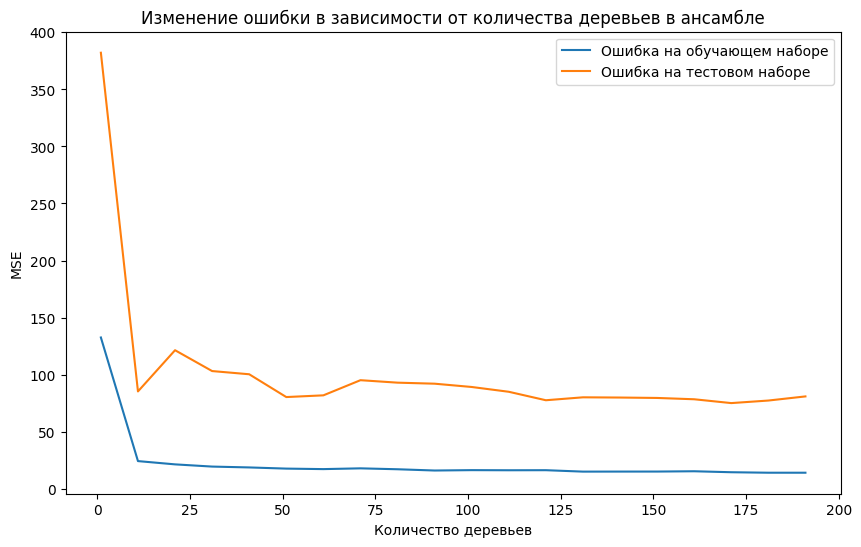

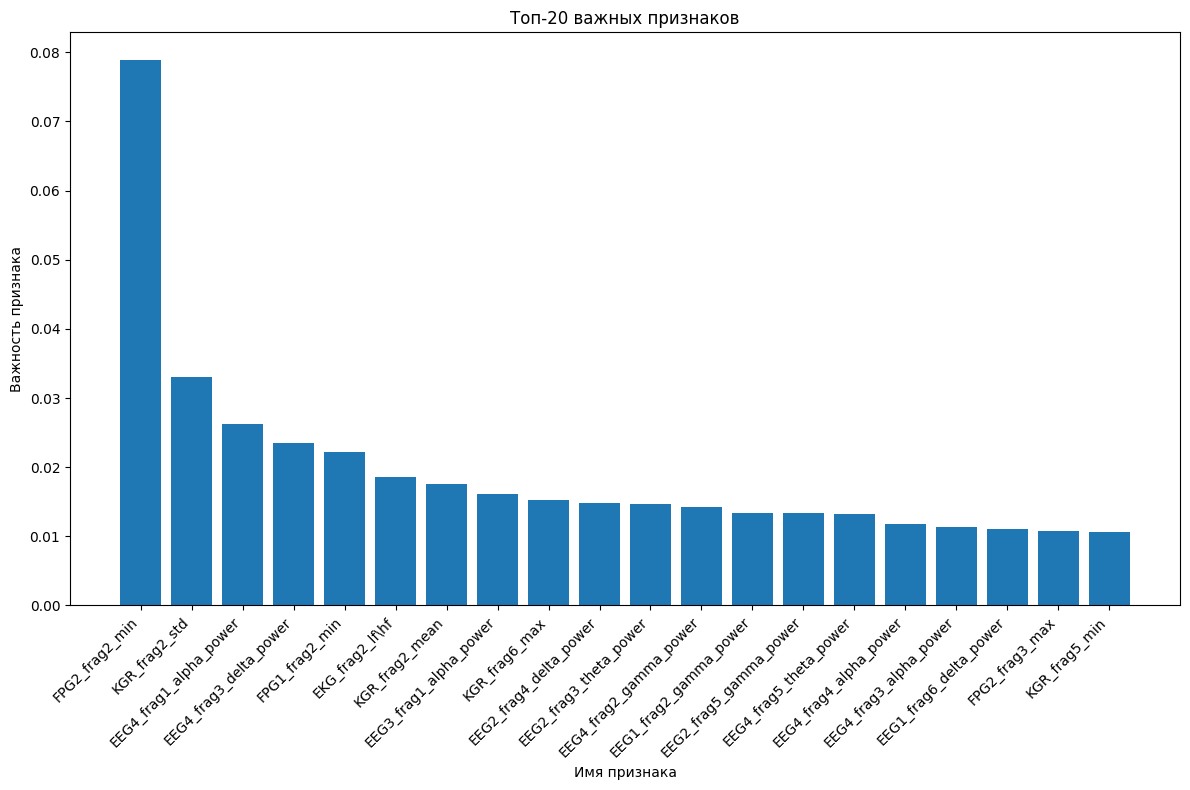

In [ ]:

'''
Следующий код демонстрирует, как можно обучить модель на полученных данных и оценить её работу:
'''
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'MSE модели: {mse}')
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

train_errors, test_errors = [], []

estimator_range = range(1, 201, 10)

for n_estimators in estimator_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_errors, label='Ошибка на обучающем наборе')
plt.plot(estimator_range, test_errors, label='Ошибка на тестовом наборе')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.legend()
plt.title('Изменение ошибки в зависимости от количества деревьев в ансамбле')
plt.show()

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = min(len(feature_names), 20)
plt.figure(figsize=(12, 8))

plt.title('Топ-20 важных признаков')
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45, ha="right")
plt.xlabel('Имя признака')
plt.ylabel('Важность признака')
plt.tight_layout()
plt.show()

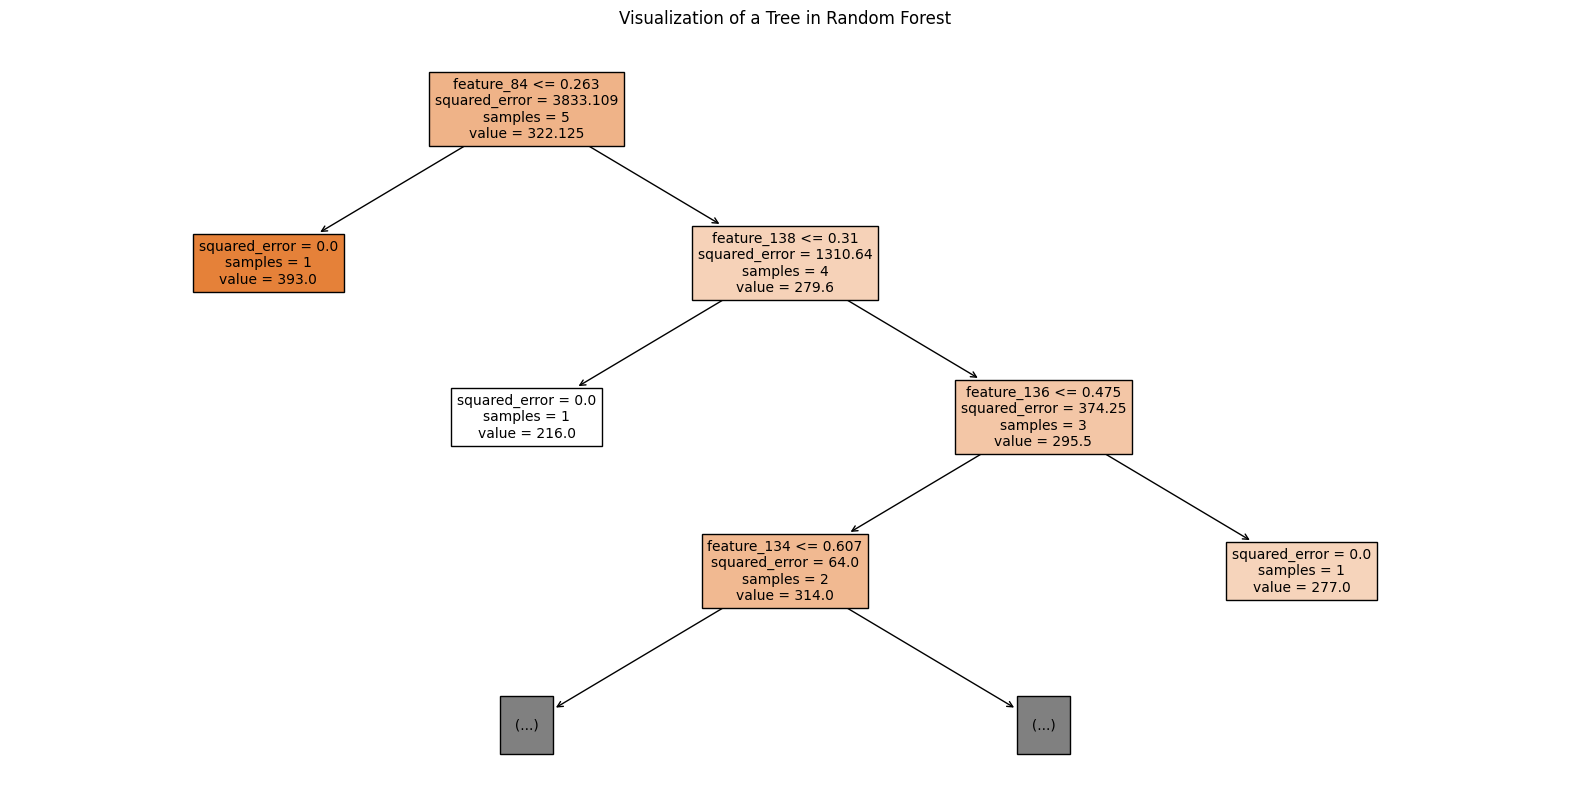

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

np.random.seed(42)
X = np.random.rand(10, 210)
y = np.array([277, 220, 306, 210, 206, 303, 322, 393, 220, 216])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

chosen_tree = model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(chosen_tree, filled=True, feature_names=[f'feature_{i}' for i in range(X.shape[1])], max_depth=3, fontsize=10)
plt.title('Visualization of a Tree in Random Forest')
plt.show()

In [ ]:
!pip install dtreeviz
# https://pypi.python.org/pypi/libarchive
!pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!pip install pydot
import pydot
!pip install cartopy
import cartopy

  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Preparing metadata (setup.py) ... done
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects


ModuleNotFoundError: No module named 'libarchive'

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from dtreeviz.trees import dtreeviz

np.random.seed(42)
X = np.random.rand(10, 210)
y = np.array([277, 220, 306, 210, 206, 303, 322, 393, 220, 216])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

tree = model.estimators_[0]

viz = dtreeviz(tree, X_train, y_train,
               target_name='target',
               feature_names=[f'feature_{i}’ for i in range(X.shape[1])'],
               title='Random Forest Example Tree')

viz.view()


ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (/usr/local/lib/python3.10/dist-packages/dtreeviz/trees.py)

Затем объединим данные

In [ ]:
import numpy as np

combined_tensors = {}

for filename, tensors in all_tensors.items():
    combined_tensor = np.concatenate(tensors, axis=0)
    combined_tensors[filename] = combined_tensor
print(combined_tensor.shape)

(453348, 8)


Теперь необходимо отфильтровать наши данные

In [ ]:
import numpy as np
import scipy.signal as signal

def apply_filters(data, sr):

    fc_high = 1
    fc_low = 50

    b_high, a_high = signal.butter(4, fc_high / (0.5 * sr), 'high')
    b_low, a_low = signal.butter(4, fc_low / (0.5 * sr), 'low')

    for column in range(4, 8):  # столбцы 5, 6, 7, и 8
        # Фильтр верхних частот
        data[:, column] = signal.filtfilt(b_high, a_high, data[:, column])
        # Фильтр нижних частот
        data[:, column] = signal.filtfilt(b_low, a_low, data[:, column])

    return data

sr = 250

EEG = {}

for filename, tensor in combined_tensors.items():
    EEG[filename] = apply_filters(tensor, sr)
print(EEG)


{'Фалько Филипп.txt': array([[ -0.04825   ,   1.06937   ,  -8.75      , ...,  -1.63138626,
          3.21347048,  -0.6307407 ],
       [ -0.04228828,   1.03646128,  -8.56369612, ...,  -1.20483018,
          4.29317397,  -0.33894649],
       [ -0.04225   ,   1.00416465,  -8.3527112 , ...,  -0.54344774,
          5.29250752,   0.15960393],
       ...,
       [  0.79235566,  -2.73046614, -22.01981186, ...,   1.07400002,
         -3.77340931,  -2.65348243],
       [  0.49430251,  -2.81365503, -21.62256806, ...,   0.53620691,
         -3.06741423,  -3.02697746],
       [  0.23425   ,  -2.89562   , -21.25      , ...,  -1.09618117,
         -3.79627373,  -3.6721286 ]]), 'Данилов Степан.txt': array([[ 0.182     , -2.1375    ,  0.4875    , ..., -3.54910296,
        -0.55176028, -3.13718708],
       [ 0.21926227, -2.1325317 ,  2.30093026, ..., -6.16267707,
        -1.07681043, -5.16468298],
       [ 0.20913313, -2.12015849,  4.55865489, ..., -8.46601979,
        -1.07314729, -7.7075594 ],
      

Создание и тренировка модели 277 220 306 210 206 303 322 393 220 216

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

import numpy as np

N = len(all_tensors)
F = 6

eeg_data = []

for i, (filename, fragments) in enumerate(all_tensors.items()):
    subject_data = []
    for fragment in fragments:

        eeg_fragment = fragment[:, 4:8]
        subject_data.append(eeg_fragment)
    eeg_data.append(subject_data)

eeg_data_np = np.array(eeg_data)

print(f"Форма итогового массива данных ЭЭГ: {eeg_data_np.shape}")

eeg_data_flat = eeg_data_np.reshape(-1, eeg_data_np.shape[2], eeg_data_np.shape[3])

print(eeg_data_flat.shape)

X = []
y = []
test_results = [277, 220, 306, 210, 206, 303, 322, 393, 220, 216]


eeg_keys = list(EEG.keys())

labels = np.repeat(test_results, 6)


for filename in EEG.keys():
    X.append(EEG[filename])


X = np.array(X)
y = np.array(labels)

Форма итогового массива данных ЭЭГ: (10, 6, 75558, 4)
(60, 75558, 4)


А теперь перейдем непосредственно к созданию и обучению модели:

In [ ]:
def plot_train_process(train_loss, val_loss, train_accuracy, val_accuracy, title_suffix=''):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title(' '.join(['Loss', title_suffix]))
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title(' '.join(['Validation accuracy', title_suffix]))
    axes[1].plot(train_accuracy, label='train')
    axes[1].plot(val_accuracy, label='validation')
    axes[1].legend()
    plt.show()

def visualize_and_save_results(model, model_name, X_train, X_test, y_train, y_test, out_dict):
    for data_name, X, y, model in [
    ('train', X_train, y_train, model),
    ('test', X_test, y_test, model)
    ]:
        if isinstance(model, BaseEstimator):
            proba = model.predict_proba(X)[:, 1]
        elif isinstance(model, nn.Module):
            proba = model(X).detach().cpu().numpy()[:, 1]
        else:
            raise ValueError('Unrecognized model type')

        auc = roc_auc_score(y, proba)

        out_dict['{}_{}'.format(model_name, data_name)] = auc
        plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (data_name, auc))

    plt.plot([0, 1], [0, 1], '--', color='black',)
    plt.legend(fontsize='large')
    plt.title(model_name)
    plt.grid()
    return out_dict

In [ ]:

X=eeg_data_flat
y = []
test_results = [277, 220, 306, 210, 206, 303, 322, 393, 220, 216]
labels = np.repeat(test_results, 6)
y = np.array(labels)

y = y / 580 * 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(filters=64, kernel_size=30, activation='relu', input_shape=(X_train.shape[1],4)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=30, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=30, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(), loss='mean_squared_error')

model.summary()

model.fit(X_train, y_train, epochs=1, verbose=1, validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 75529, 64)         7744      
                                                                 
 max_pooling1d (MaxPooling1  (None, 37764, 64)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 37735, 128)        245888    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 18867, 128)        0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 18838, 256)        983296    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 9419, 256)         0

693277760.0

Epoch 1/23
1/1 [==============================] - 209s 209s/step - loss: 681367744.0000 - val_loss: 827251.1875
Epoch 2/23
1/1 [==============================] - 207s 207s/step - loss: 883690.5625 - val_loss: 2564.5227
Epoch 3/23
1/1 [==============================] - 210s 210s/step - loss: 2145.6541 - val_loss: 1666.3457
Epoch 4/23
1/1 [==============================] - 207s 207s/step - loss: 1592.8522 - val_loss: 1498.7661
Epoch 5/23
1/1 [==============================] - 209s 209s/step - loss: 1460.0381 - val_loss: 1503.4409
Epoch 6/23
1/1 [==============================] - 207s 207s/step - loss: 1649.7808 - val_loss: 1715.7548
Epoch 7/23
1/1 [==============================] - 203s 203s/step - loss: 1577.8131 - val_loss: 2083.3914
Epoch 8/23
1/1 [==============================] - 210s 210s/step - loss: 1829.5074 - val_loss: 2374.4583
Epoch 9/23
1/1 [==============================] - 208s 208s/step - loss: 1947.0020 - val_loss: 2502.5500
Epoch 10/23
1/1 [=============================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


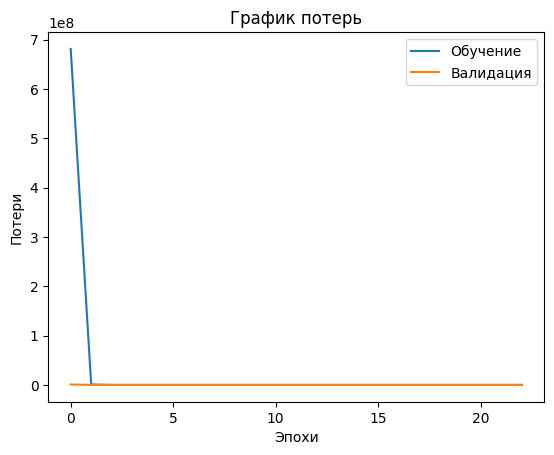

In [ ]:
import matplotlib.pyplot as plt
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
history = model.fit(X_train, y_train, batch_size=256, epochs=23, verbose=1, validation_data=(X_test, y_test))

model.save('моя модель.h5')
import json

with open('history.json','w') as f:
    json.dump(history.history, f)

plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('График потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()


if 'mean_squared_error' in history.history:
    plt.plot(history.history['mean_squared_error'], label='Обучение MSE')
    if 'val_mean_squared_error' in history.history:
        plt.plot(history.history['val_mean_squared_error'], label='Валидация MSE')
    plt.title('График среднеквадратической ошибки (MSE)')
    plt.xlabel('Эпохи')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

1/1 [==============================] - 14s 14s/step


ValueError: continuous format is not supported

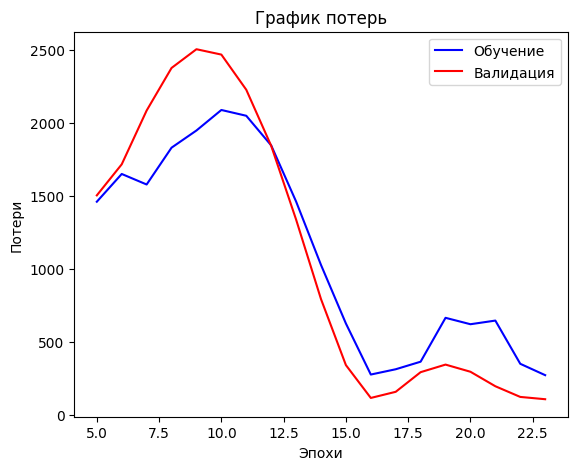

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

y_pred_probs = model.predict(X_test)

def plot_metrics(history, y_test, y_pred_probs, start_epoch=5):
    epochs = range(start_epoch, len(history.history['loss']) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'][start_epoch-1:],'b-', label='Обучение')
    plt.plot(epochs, history.history['val_loss'][start_epoch-1:], 'r', label='Валидация')
    plt.title('График потерь')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k–')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ложноположительные')
    plt.ylabel('Истинноположительные')
    plt.title('ROC AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower righ')

    plt.show()

plot_metrics(history, y_test, y_pred_probs)

In [ ]:
Epoch 1/150
2/2 [==============================] - 183s 77s/step - loss: 276484.4375 - val_loss: 3472.9587
Epoch 2/150
2/2 [==============================] - 182s 76s/step - loss: 5291.7261 - val_loss: 238.1338
Epoch 3/150

In [ ]:

import matplotlib.pyplot as plt
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

model.save('моя модель.h5')
import json

Epoch 1/100
2/2 [==============================] - 176s 69s/step - loss: 2269.0125 - val_loss: 2628.7771
Epoch 2/100
2/2 [==============================] - 175s 66s/step - loss: 2186.3308 - val_loss: 2567.9990
Epoch 3/100
2/2 [==============================] - 181s 76s/step - loss: 2150.4949 - val_loss: 2564.9485
Epoch 4/100
2/2 [==============================] - 184s 75s/step - loss: 2147.2920 - val_loss: 2564.8308
Epoch 5/100
2/2 [==============================] - 173s 67s/step - loss: 2147.1614 - val_loss: 2564.8455
Epoch 6/100
2/2 [==============================] - 172s 67s/step - loss: 2147.1775 - val_loss: 2563.5281
Epoch 7/100
2/2 [==============================] - 170s 65s/step - loss: 2144.2976 - val_loss: 2549.5632
Epoch 8/100
2/2 [==============================] - 173s 65s/step - loss: 2131.1250 - val_loss: 2523.8979
Epoch 9/100
2/2 [==============================] - 176s 70s/step - loss: 2105.0825 - val_loss: 2484.2683
Epoch 10/100
2/2 [==============================] - 181s 75s/step - loss: 2065.8640 - val_loss: 2426.7761
Epoch 11/100
2/2 [==============================] - 173s 66s/step - loss: 2013.0690 - val_loss: 2347.5391
Epoch 12/100
2/2 [==============================] - 186s 80s/step - loss: 1937.5361 - val_loss: 2243.1357
Epoch 13/100
2/2 [==============================] - 171s 65s/step - loss: 1828.1295 - val_loss: 2111.2166
Epoch 14/100
2/2 [==============================] - 181s 74s/step - loss: 1728.2197 - val_loss: 1951.6481
Epoch 15/100
2/2 [==============================] - 181s 76s/step - loss: 1566.2494 - val_loss: 1750.0948
Epoch 16/100
2/2 [==============================] - 173s 66s/step - loss: 1375.3145 - val_loss: 1498.6802
Epoch 17/100
2/2 [==============================] - 173s 67s/step - loss: 1170.7358 - val_loss: 1222.3688
Epoch 18/100
2/2 [==============================] - 171s 66s/step - loss: 1020.5126 - val_loss: 938.3792
Epoch 19/100
2/2 [==============================] - 182s 73s/step - loss: 707.2661 - val_loss: 665.5956
Epoch 20/100
2/2 [==============================] - 180s 68s/step - loss: 609.4150 - val_loss: 427.0006
Epoch 21/100
2/2 [==============================] - 182s 69s/step - loss: 313.8641 - val_loss: 245.6059
Epoch 22/100
2/2 [==============================] - 185s 68s/step - loss: 260.0315 - val_loss: 140.1419
Epoch 23/100
2/2 [==============================] - 173s 67s/step - loss: 215.2811 - val_loss: 109.3438
Epoch 24/100
2/2 [==============================] - 172s 67s/step - loss: 258.2341 - val_loss: 114.1925
Epoch 25/100
2/2 [==============================] - 170s 65s/step - loss: 344.7593 - val_loss: 120.2396
Epoch 26/100
2/2 [==============================] - 172s 66s/step - loss: 404.6039 - val_loss: 113.9998
Epoch 27/100
2/2 [==============================] - 177s 70s/step - loss: 332.9507 - val_loss: 108.8430
Epoch 28/100
2/2 [==============================] - 182s 75s/step - loss: 272.8378 - val_loss: 116.0144
Epoch 29/100
2/2 [==============================] - 173s 66s/step - loss: 233.5563 - val_loss: 138.4185
Epoch 30/100
2/2 [==============================] - 173s 67s/step - loss: 255.4249 - val_loss: 170.3274
Epoch 31/100
2/2 [==============================] - 181s 76s/step - loss: 211.0402 - val_loss: 202.5054
Epoch 32/100
2/2 [==============================] - 173s 66s/step - loss: 190.6283 - val_loss: 229.7704
Epoch 33/100
2/2 [==============================] - 173s 67s/step - loss: 230.0609 - val_loss: 243.8599
Epoch 34/100
2/2 [==============================] - 181s 75s/step - loss: 257.2327 - val_loss: 245.0809
Epoch 35/100
2/2 [==============================] - 173s 67s/step - loss: 217.8826 - val_loss: 232.9402
Epoch 36/100
2/2 [==============================] - 174s 67s/step - loss: 351.8330 - val_loss: 214.0741
Epoch 37/100
2/2 [==============================] - 182s 76s/step - loss: 277.5100 - val_loss: 194.1699
Epoch 38/100
2/2 [==============================] - 174s 66s/step - loss: 217.9892 - val_loss: 179.0373
Epoch 39/100
2/2 [==============================] - 175s 68s/step - loss: 306.7747 - val_loss: 165.3516
Epoch 40/100
2/2 [==============================] - 182s 76s/step - loss: 272.7918 - val_loss: 154.1480
Epoch 41/100
2/2 [==============================] - 174s 66s/step - loss: 228.2772 - val_loss: 142.5598
Epoch 42/100
2/2 [==============================] - 174s 67s/step - loss: 213.7580 - val_loss: 135.4037
Epoch 43/100
2/2 [==============================] - 175s 68s/step - loss: 253.3392 - val_loss: 136.0614
Epoch 44/100
2/2 [==============================] - 183s 76s/step - loss: 239.4093 - val_loss: 136.6640
Epoch 45/100
2/2 [==============================] - 175s 66s/step - loss: 269.8328 - val_loss: 136.9829
Epoch 46/100
2/2 [==============================] - 174s 67s/step - loss: 238.4944 - val_loss: 138.5056
Epoch 47/100
2/2 [==============================] - 182s 76s/step - loss: 250.1002 - val_loss: 141.9972
Epoch 48/100
2/2 [==============================] - 174s 66s/step - loss: 245.4578 - val_loss: 147.9877
Epoch 49/100
2/2 [==============================] - 187s 76s/step - loss: 223.1909 - val_loss: 153.8076
Epoch 50/100
2/2 [==============================] - 182s 76s/step - loss: 303.2051 - val_loss: 165.6015
Epoch 51/100
2/2 [==============================] - 173s 66s/step - loss: 237.6111 - val_loss: 176.7249
Epoch 52/100
2/2 [==============================] - 173s 67s/step - loss: 264.6123 - val_loss: 182.7435
Epoch 53/100
2/2 [==============================] - 181s 75s/step - loss: 196.9733 - val_loss: 183.8848
Epoch 54/100
2/2 [==============================] - 173s 67s/step - loss: 212.7709 - val_loss: 182.1781
Epoch 55/100
2/2 [==============================] - 181s 76s/step - loss: 234.8031 - val_loss: 180.1593
Epoch 56/100
2/2 [==============================] - 173s 67s/step - loss: 209.2804 - val_loss: 169.1148
Epoch 57/100
2/2 [==============================] - 174s 68s/step - loss: 228.4200 - val_loss: 160.5510
Epoch 58/100
2/2 [==============================] - 182s 76s/step - loss: 179.1418 - val_loss: 154.3867
Epoch 59/100
2/2 [==============================] - 173s 66s/step - loss: 191.7756 - val_loss: 151.0973
Epoch 60/100
2/2 [==============================] - 173s 67s/step - loss: 317.5759 - val_loss: 152.9237
Epoch 61/100
2/2 [==============================] - 181s 75s/step - loss: 274.3254 - val_loss: 161.5116
Epoch 62/100
2/2 [==============================] - 173s 66s/step - loss: 202.5566 - val_loss: 170.5398
Epoch 63/100
2/2 [==============================] - 173s 68s/step - loss: 260.9091 - val_loss: 178.2197
Epoch 64/100
2/2 [==============================] - 182s 76s/step - loss: 225.2330 - val_loss: 174.6481
Epoch 65/100
2/2 [==============================] - 173s 67s/step - loss: 162.2051 - val_loss: 167.9435
Epoch 66/100
2/2 [==============================] - 177s 69s/step - loss: 182.1379 - val_loss: 164.6029
Epoch 67/100
2/2 [==============================] - 173s 67s/step - loss: 244.4563 - val_loss: 162.7026
Epoch 68/100
2/2 [==============================] - 181s 75s/step - loss: 230.3942 - val_loss: 162.2466
Epoch 69/100
2/2 [==============================] - 173s 67s/step - loss: 202.9956 - val_loss: 159.3099
Epoch 70/100
2/2 [==============================] - 173s 67s/step - loss: 267.1724 - val_loss: 157.4092
Epoch 71/100
2/2 [==============================] - 181s 76s/step - loss: 212.6626 - val_loss: 158.3015
Epoch 72/100
2/2 [==============================] - 173s 66s/step - loss: 188.9387 - val_loss: 164.1778
Epoch 73/100
2/2 [==============================] - 172s 67s/step - loss: 177.5947 - val_loss: 167.4164
Epoch 74/100
2/2 [==============================] - 181s 75s/step - loss: 219.4177 - val_loss: 172.1749
Epoch 75/100
2/2 [==============================] - 177s 71s/step - loss: 195.6308 - val_loss: 167.0854
Epoch 76/100
2/2 [==============================] - 173s 67s/step - loss: 208.1654 - val_loss: 164.4026
Epoch 77/100
2/2 [==============================] - 173s 67s/step - loss: 206.6242 - val_loss: 161.4031
Epoch 78/100
2/2 [==============================] - 171s 65s/step - loss: 198.5682 - val_loss: 152.6950
Epoch 79/100
2/2 [==============================] - 172s 65s/step - loss: 221.7609 - val_loss: 148.2421
Epoch 80/100
2/2 [==============================] - 173s 67s/step - loss: 191.6840 - val_loss: 145.3535
Epoch 81/100
2/2 [==============================] - 172s 67s/step - loss: 156.4454 - val_loss: 142.7449
Epoch 82/100
2/2 [==============================] - 171s 65s/step - loss: 184.0284 - val_loss: 138.9859
Epoch 83/100
2/2 [==============================] - 174s 65s/step - loss: 207.7256 - val_loss: 136.1011
Epoch 84/100
2/2 [==============================] - 174s 67s/step - loss: 200.0322 - val_loss: 136.1485
Epoch 85/100
2/2 [==============================] - 181s 75s/step - loss: 155.7531 - val_loss: 139.4237
Epoch 86/100
2/2 [==============================] - 173s 66s/step - loss: 206.8249 - val_loss: 144.6455
Epoch 87/100
2/2 [==============================] - 173s 67s/step - loss: 212.4134 - val_loss: 153.4178
Epoch 88/100
2/2 [==============================] - 172s 66s/step - loss: 154.7978 - val_loss: 166.8876
Epoch 89/100
2/2 [==============================] - 172s 65s/step - loss: 193.3007 - val_loss: 178.1271
Epoch 90/100
2/2 [==============================] - 173s 67s/step - loss: 265.0028 - val_loss: 192.2954
Epoch 91/100
2/2 [==============================] - 174s 68s/step - loss: 228.7719 - val_loss: 201.7977
Epoch 92/100
2/2 [==============================] - 181s 75s/step - loss: 225.5925 - val_loss: 206.1333
Epoch 93/100
2/2 [==============================] - 173s 66s/step - loss: 150.6524 - val_loss: 203.3783
Epoch 94/100
2/2 [==============================] - 173s 67s/step - loss: 178.8384 - val_loss: 190.9509
Epoch 95/100
2/2 [==============================] - 181s 76s/step - loss: 190.5241 - val_loss: 177.3814
Epoch 96/100
2/2 [==============================] - 181s 75s/step - loss: 254.0979 - val_loss: 169.3059

In [ ]:
model.evaluate(X_test, y_test)

NameError: name 'model' is not defined